In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv(r"C:\Users\hsynt\Downloads\Selcuk Abi\Selcuk Abi\VeriSeti2.csv")

Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6828 - loss: 0.5946 - val_accuracy: 0.8171 - val_loss: 0.4186
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8070 - loss: 0.4342 - val_accuracy: 0.8148 - val_loss: 0.4154
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8091 - loss: 0.4269 - val_accuracy: 0.8163 - val_loss: 0.4122
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8105 - loss: 0.4223 - val_accuracy: 0.8155 - val_loss: 0.4115
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8182 - loss: 0.4179 - val_accuracy: 0.8155 - val_loss: 0.4123
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8118 - loss: 0.4203 - val_accuracy: 0.8155 - val_loss: 0.4131
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8164 - loss: 0.4148 - val_accuracy: 0.8160 - val_loss: 0.4116
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8147 - loss: 0.4157 - 

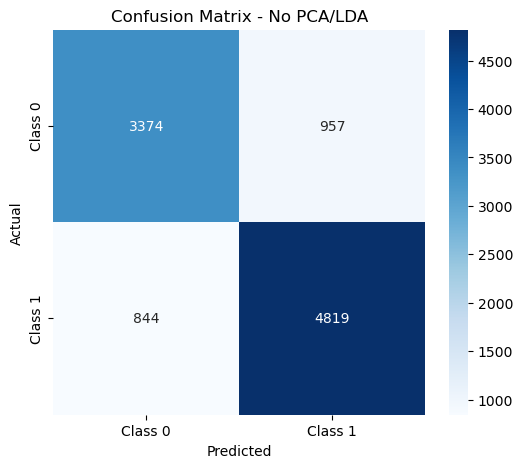

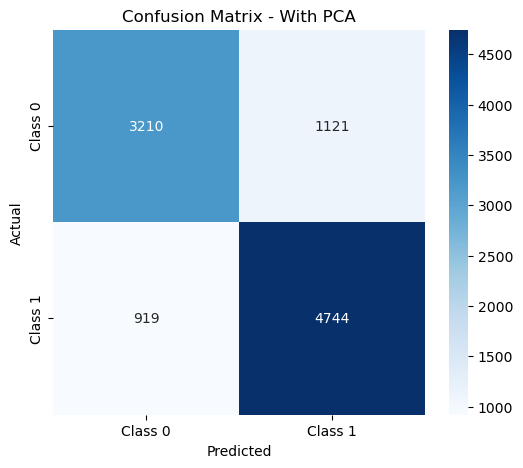

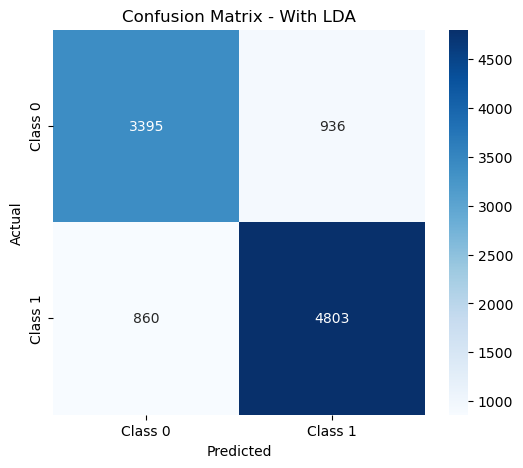

521/521 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step
521/521 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step
521/521 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step
521/521 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step
521/521 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step
521/521 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step
521/521 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step
521/521 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step
521/521 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step
521/521 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step
521/521 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step
521/521 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step
521/521 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step
521/521 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step
521/521 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step
521/521 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step
521/521 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step
521/521 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step

K-Fold Results:
   Accuracy  Precision    Recall  F1-Score   AUC-ROC Model  \
0  0.819404   0.829772  0.865734  0.847372  0.886987   MLP   
1  0.817903   0.819606  0.879005  0.848267  0.885850   MLP   
2  0.819464   0.835999 

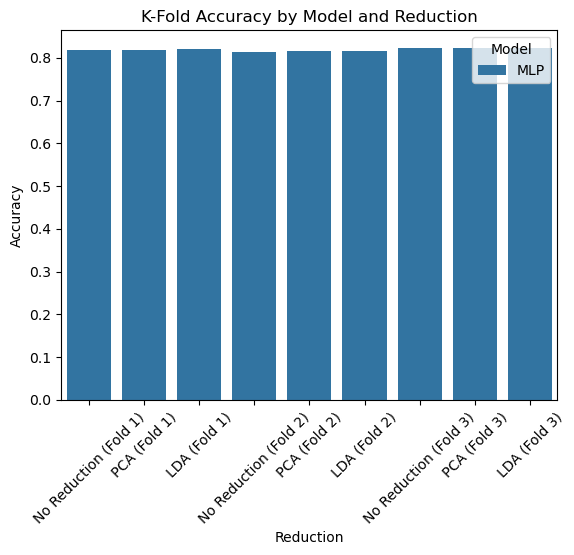

In [3]:
# Özellik ve Hedef Ayrımı
X = data.drop(columns=['Target_10', 'adjclose'])
y = data['Target_10']

# Özellikleri Ölçeklendirme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Eğitim ve Test Setlerine Bölme
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# PCA ve LDA Tanımları
pca = PCA(n_components=10)
lda = LDA()

# MLP Modelini Tanımlama
def build_mlp_model(input_dim):
    model = Sequential([
        Input(shape=(input_dim,)),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Performans Metriklerini Hesaplama
def calculate_metrics(y_true, y_pred, y_pred_proba):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-Score": f1_score(y_true, y_pred),
        "AUC-ROC": roc_auc_score(y_true, y_pred_proba)
    }

# Holdout Sonuçları
mlp_model = build_mlp_model(X_train.shape[1])
mlp_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

y_pred_no_reduction = (mlp_model.predict(X_test) > 0.5).astype("int32").flatten()
y_pred_proba_no_reduction = mlp_model.predict(X_test).flatten()

holdout_results = {
    "No PCA/LDA": calculate_metrics(y_test, y_pred_no_reduction, y_pred_proba_no_reduction)
}

# PCA ile MLP Modeli
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

mlp_model_pca = build_mlp_model(X_train_pca.shape[1])
mlp_model_pca.fit(X_train_pca, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

y_pred_pca = (mlp_model_pca.predict(X_test_pca) > 0.5).astype("int32").flatten()
y_pred_proba_pca = mlp_model_pca.predict(X_test_pca).flatten()

holdout_results["With PCA"] = calculate_metrics(y_test, y_pred_pca, y_pred_proba_pca)

# LDA ile MLP Modeli
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

mlp_model_lda = build_mlp_model(X_train_lda.shape[1])
mlp_model_lda.fit(X_train_lda, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

y_pred_lda = (mlp_model_lda.predict(X_test_lda) > 0.5).astype("int32").flatten()
y_pred_proba_lda = mlp_model_lda.predict(X_test_lda).flatten()

holdout_results["With LDA"] = calculate_metrics(y_test, y_pred_lda, y_pred_proba_lda)

# Holdout Sonuçlarını Gösterme
holdout_df = pd.DataFrame(holdout_results).T
print("Holdout Results:")
print(holdout_df)

# Karışıklık Matrislerini Görselleştirme
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

plot_confusion_matrix(y_test, y_pred_no_reduction, "Confusion Matrix - No PCA/LDA")
plot_confusion_matrix(y_test, y_pred_pca, "Confusion Matrix - With PCA")
plot_confusion_matrix(y_test, y_pred_lda, "Confusion Matrix - With LDA")

# K-Fold Çapraz Doğrulama
kf = KFold(n_splits=3)
kfold_results = []

for fold, (train_index, test_index) in enumerate(kf.split(X_scaled)):
    X_fold_train, X_fold_test = X_scaled[train_index], X_scaled[test_index]
    y_fold_train, y_fold_test = y.iloc[train_index], y.iloc[test_index]

    X_fold_train_pca = pca.fit_transform(X_fold_train)
    X_fold_test_pca = pca.transform(X_fold_test)

    X_fold_train_lda = lda.fit_transform(X_fold_train, y_fold_train)
    X_fold_test_lda = lda.transform(X_fold_test)

    for reduction, X_train_red, X_test_red in zip(
        ['No Reduction', 'PCA', 'LDA'],
        [X_fold_train, X_fold_train_pca, X_fold_train_lda],
        [X_fold_test, X_fold_test_pca, X_fold_test_lda]
    ):
        mlp_model_fold = build_mlp_model(X_train_red.shape[1])
        mlp_model_fold.fit(X_train_red, y_fold_train, epochs=5, batch_size=32, verbose=0)

        y_fold_pred = (mlp_model_fold.predict(X_test_red) > 0.5).astype("int32").flatten()
        y_fold_proba = mlp_model_fold.predict(X_test_red).flatten()

        metrics = calculate_metrics(y_fold_test, y_fold_pred, y_fold_proba)
        metrics['Model'] = 'MLP'
        metrics['Reduction'] = f'{reduction} (Fold {fold + 1})'
        kfold_results.append(metrics)

kfold_df = pd.DataFrame(kfold_results)
print("\nK-Fold Results:")
print(kfold_df)

sns.barplot(data=kfold_df, x='Reduction', y='Accuracy', hue='Model')
plt.title('K-Fold Accuracy by Model and Reduction')
plt.xticks(rotation=45)
plt.show()